<a href="https://colab.research.google.com/github/FlakysB/Loan_Default_Prediction/blob/main/Original_copy_of_Loan_Default_Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAN** **DEFAULT** **PREDICTION** **ANALYSIS**

####**OVERVIEW**

Loan default prediction is a problem in the financial industry, as it can help lenders or banks identify borrowers who are likely to default on their loans.

 Loan default prediction involves analyzing variables that describe loans and the financial situations of their borrowers, such as loan characteristics, borrower behaviors, and default rates.

 Loan default prediction can be used to adjust loan terms/conditions, reserve additional funds to cover potential losses, or even deny/refuse loans to high-risk borrowers.In this analysis, I will develop a machine learning-based solution to predict loan default.

####**DATASET** **DESCRIPTION**
In this project, the loan dataset that  is used consist of 255347 records and 18 columns. The feature Default represents whether the customer has defaulted on their loan or not. The objective is to build a machine learning-based solution to predict the loan default of customers in advance based on features such as Age,	Income,	LoanAmount,	CreditScore	MonthsEmployed,	NumCreditLines,	InterestRate,	LoanTerm,	DTIRatio,	Education,	EmploymentType,	MaritalStatus,	HasMortgage,	HasDependents,	LoanPurpose,	HasCoSigner etc.

####**DATASET** **FEATURE** **DESCRIPTIONS**

The description for the features present in this dataset is -
*   LoanID: Unique identifier for each loan application (Object).
*   Age: Age of the applicant in years (Integer).
*   Income: Applicant's annual income (Integer).
*   LoanAmount: Amount of the loan requested (Integer).
*   CreditScore: Credit score of the applicant (Integer).
*   MonthsEmployed: Number of months the applicant has been employed (Integer).
*   NumCreditLines: Number of credit lines the applicant currently has
    (Integer).
*   InterestRate: Interest rate for the loan in percentage (Float).
*   LoanTerm: Term of the loan in months (Integer).
*   DTIRatio: Debt-to-Income ratio of the applicant (Float).
*   Education: Highest level of education attained by the applicant (Object).
*   EmploymentType: Employment status of the applicant (Object).
*   MaritalStatus: Marital status of the applicant (Object).
*   HasMortgage: Indicates whether the applicant has a mortgage (Object/
    Boolean).
*   HasDependents: Indicates whether the applicant has dependents
(Object/Boolean).
*   LoanPurpose: Purpose of the loan (Object).
*   HasCoSigner: Indicates whether the applicant has a co-signer (Object/
    Boolean).
*   Default: Indicates whether the loan defaulted (Integer/Boolean).

In [1]:
#import the required libraries to read in data set and perform mathematical calculation
import pandas as pd
import numpy as np

In [2]:
# Load csv file into pandas dataframe
df = pd.read_csv('/content/Loan_default.csv')
df.shape

(255347, 18)

####**STEP 1**: **Explore** **Dataset**

This is to dive into the dataset, gain insight into various features and their distributions, to understand the relationship between different variables and their potential impact on loan default through data manipulation, statistical analysis and visualization.

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [5]:
df.sample(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
201292,W5WRS10D71,49,52349,215752,532,29,3,14.91,12,0.42,Bachelor's,Self-employed,Single,Yes,Yes,Other,No,1
29575,EXQYNKSHH9,52,43807,15880,426,2,3,9.56,36,0.65,Bachelor's,Self-employed,Married,No,Yes,Other,Yes,0
864,Y60WAGDF8J,18,65143,106510,591,115,1,23.29,12,0.28,PhD,Unemployed,Married,No,Yes,Business,No,1
142675,YIY80GUP5M,46,100836,50445,556,56,1,2.14,48,0.33,Bachelor's,Unemployed,Divorced,No,No,Home,No,0
102642,7LIXJV7ONC,57,143210,119494,717,87,1,19.17,12,0.38,High School,Self-employed,Divorced,No,Yes,Home,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

From the analysis above it can be seen that there is no nulls in the dataset and the datatype for each column is correct.

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


The analysis above also signify there are no outliers in the dataset.

In [9]:
# Import libraries required for visualization
import matplotlib.pyplot as plt
import seaborn as sns

####**Visualize Distribution of Numerical Columns**

In [10]:
# Creating a log of Income distribution
df_incomeLog= np.log(df['Income'])
df_incomeLog

0         11.362033
1         10.828381
2         11.341045
3         10.364482
4          9.925102
            ...    
255342    10.544789
255343    10.858095
255344    11.348287
255345    11.351688
255346    10.017619
Name: Income, Length: 255347, dtype: float64

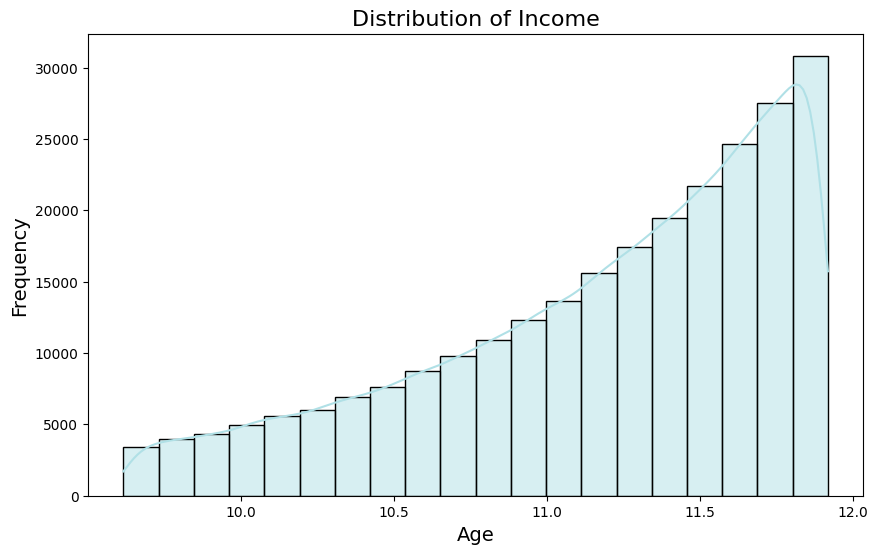

In [11]:
#Visualize the distribution of Income.

plt.figure(figsize=(10, 6))

sns.set_palette(['powderblue'])
sns.histplot(df_incomeLog, bins=20, kde=True)

plt.title('Distribution of Income', fontsize=16,)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



In [12]:
# Creating a log for Loan Amount
df_loanLog = np.log(df['LoanAmount'])
df_loanLog

0         10.831450
1         11.731579
2         11.769024
3         10.709941
4          9.120306
            ...    
255342    12.258105
255343    12.154248
255344    12.246706
255345    11.011638
255346     9.824498
Name: LoanAmount, Length: 255347, dtype: float64

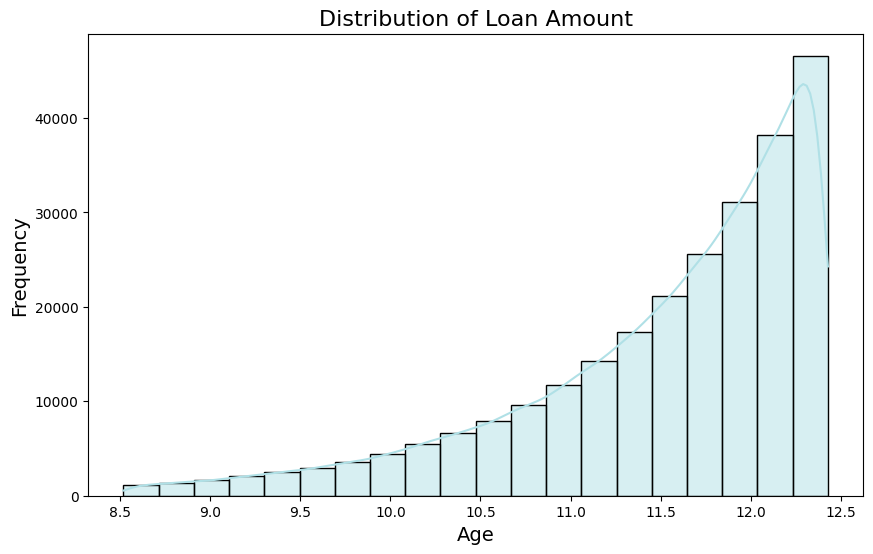

In [13]:
 #Visualize the distribution of Loan Amount.

plt.figure(figsize=(10, 6))

sns.set_palette(['powderblue'])
sns.histplot(df_loanLog, bins=20, kde=True)

plt.title('Distribution of Loan Amount', fontsize=16,)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



<ipython-input-14-2ac97f41fd22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=df, palette=colors, hue = None)


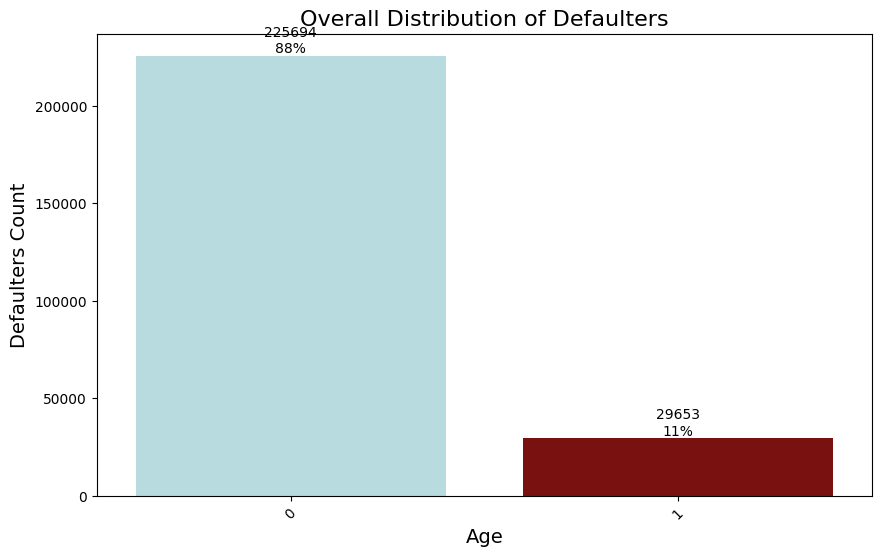

In [14]:
#Visualize Overall distribution of defaulters in dataset
colors = ['powderblue', 'darkred']

plt.figure(figsize=(10, 6))
sns.countplot(x='Default', data=df, palette=colors, hue = None)
plt.title('Overall Distribution of Defaulters', fontsize=16,)
plt.xlabel('Age', fontsize=14,)
plt.ylabel('Defaulters Count', fontsize=14,)
plt.xticks(rotation=45,)


# Add labels to the bars with both count and percentage
labe = len(df['Default'])
for i, (count, percentage) in enumerate(zip(df['Default'].value_counts(ascending=False).iloc[:10].values,
                                            df['Default'].value_counts(ascending=False).iloc[:10].values / labe * 100)):
    plt.text(i, count, f'{count}\n{int(percentage)}%', ha='center', va='bottom')

plt.show()

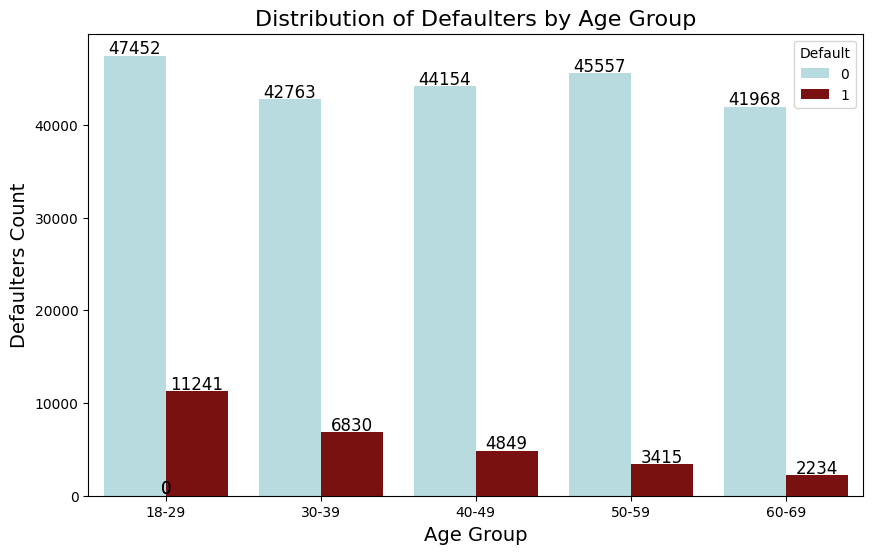

In [15]:
# Plot a count plot to show distribution of defaulters by AgeGroup.
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69']

#df_ageGroup = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
df_ageGroup = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a new DataFrame
df_new = df.copy()  # Create a copy of the original DataFrame
df_new['AgeGroup'] = df_ageGroup

colors = ['powderblue', 'darkred']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AgeGroup', data=df_new, palette=colors, hue='Default', order=age_labels)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Defaulters by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Defaulters Count', fontsize=14)
plt.show()

####**Visualize the distribution of categorical features**

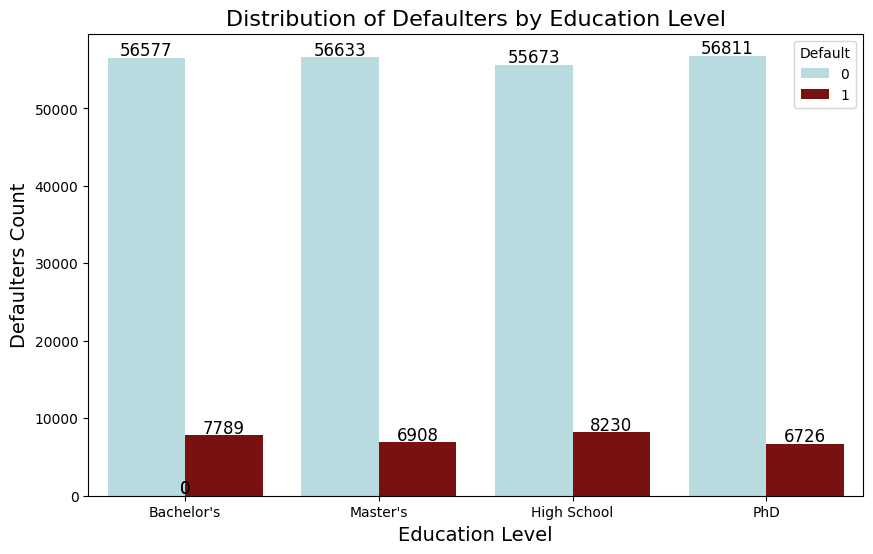

In [16]:
# Plot Count Plot to show distribution of categorical features in the data.

colors = ['powderblue', 'darkred']
plt.figure(figsize=(10, 6))
ax= sns.countplot(x='Education', data=df, palette=colors, hue='Default')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Defaulters by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Defaulters Count', fontsize=14)
plt.show()


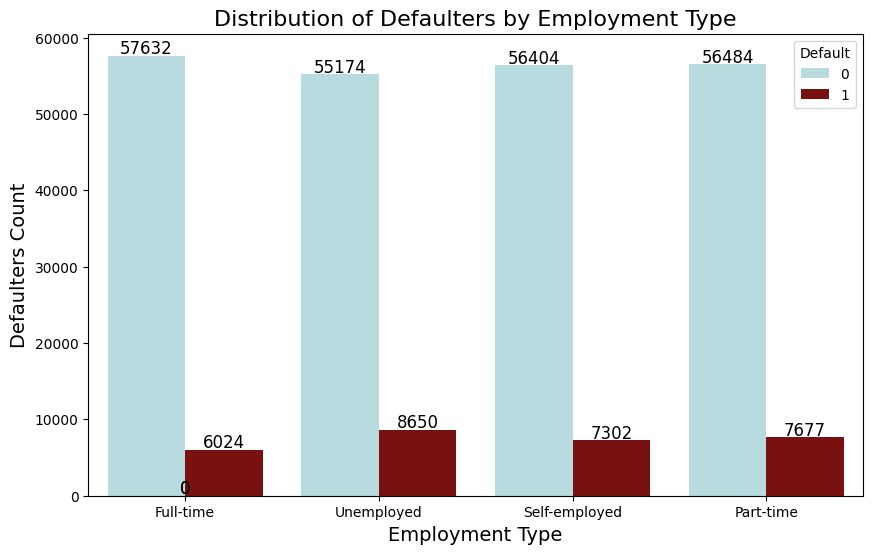

In [17]:
# Distribution of Defaulters by Employment Type
colors = ['powderblue', 'darkred']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='EmploymentType', data=df, palette=colors, hue='Default')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Defaulters by Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Defaulters Count', fontsize=14)
plt.show()

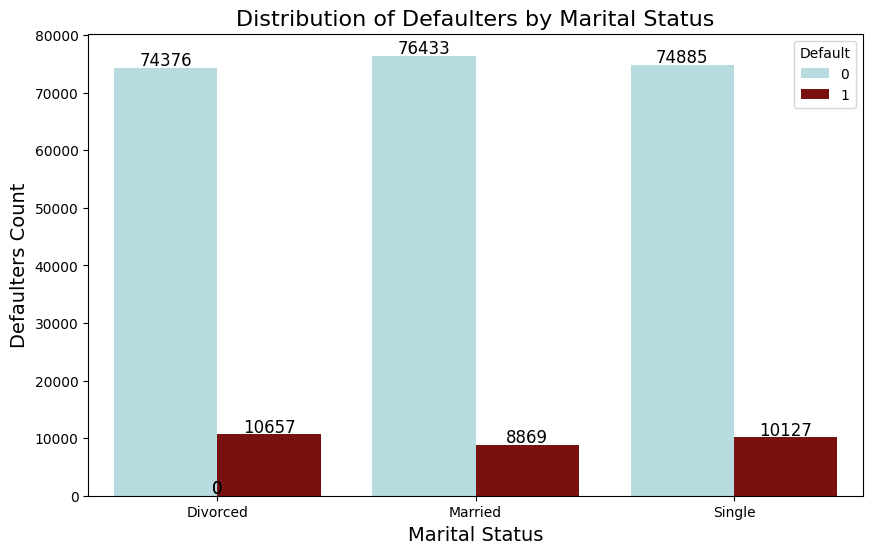

In [18]:
#Distribution of Defaulters by Marital Status.
colors = ['powderblue', 'darkred']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MaritalStatus', data=df, palette=colors, hue='Default')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Defaulters by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Defaulters Count', fontsize=14)
plt.show()

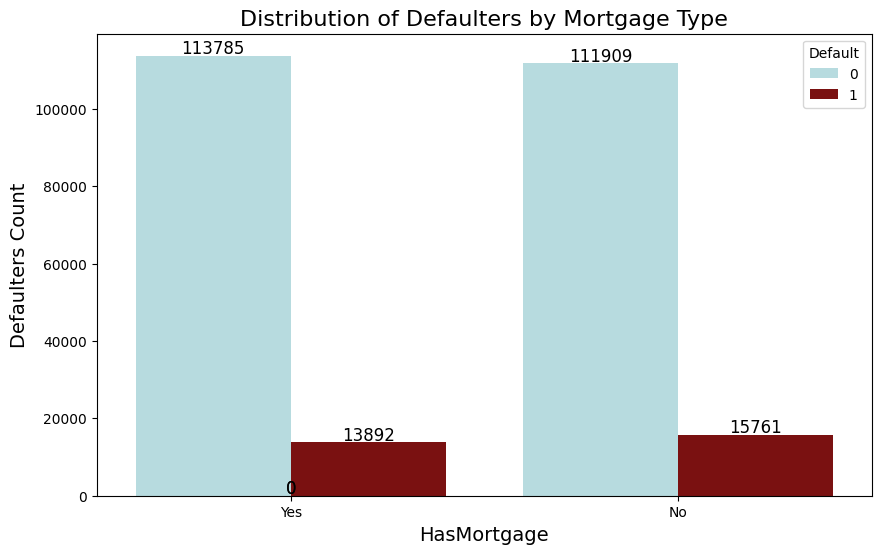

In [19]:
#Distribution of Defaulters by Mortgage Type.

colors = ['powderblue', 'darkred']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='HasMortgage', data=df, palette=colors, hue='Default')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Defaulters by Mortgage Type', fontsize=16)
plt.xlabel('HasMortgage', fontsize=14)
plt.ylabel('Defaulters Count', fontsize=14)
plt.show()

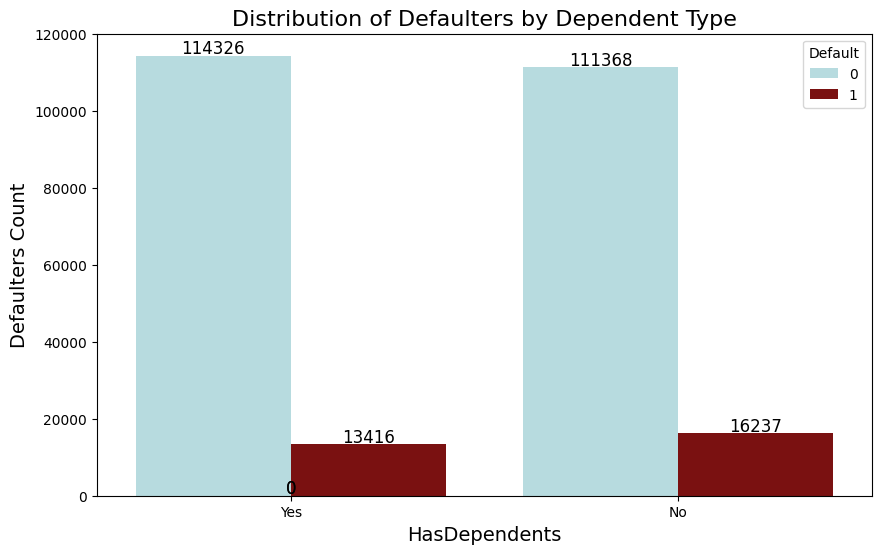

In [20]:
#Distributors of Defaulters by Depedent Type.

colors = ['powderblue', 'darkred']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='HasDependents', data=df, palette=colors, hue='Default')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Defaulters by Dependent Type', fontsize=16)
plt.xlabel('HasDependents', fontsize=14)
plt.ylabel('Defaulters Count', fontsize=14)
plt.show()

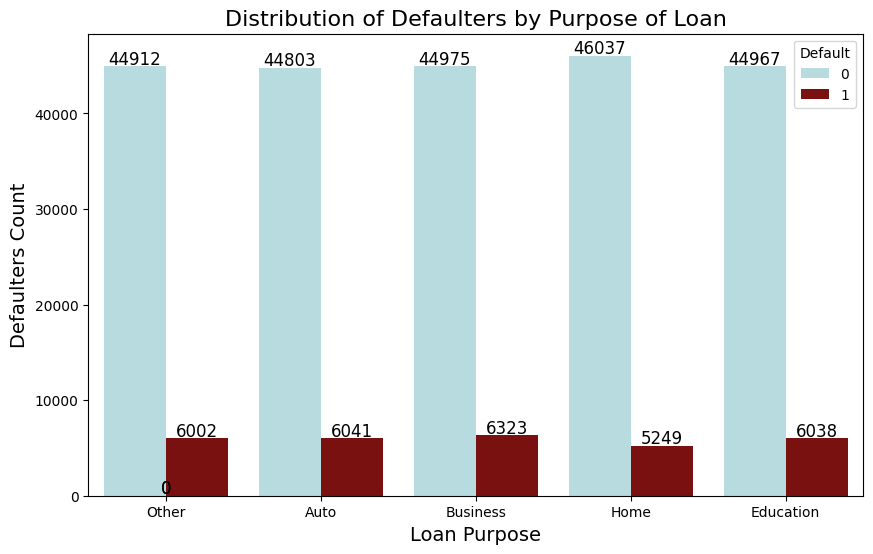

In [21]:
# Distribution of Defaulters by Purpose of Loan.
colors = ['powderblue', 'darkred']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='LoanPurpose', data=df, palette=colors, hue='Default')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Defaulters by Purpose of Loan', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Defaulters Count', fontsize=14)
plt.show()

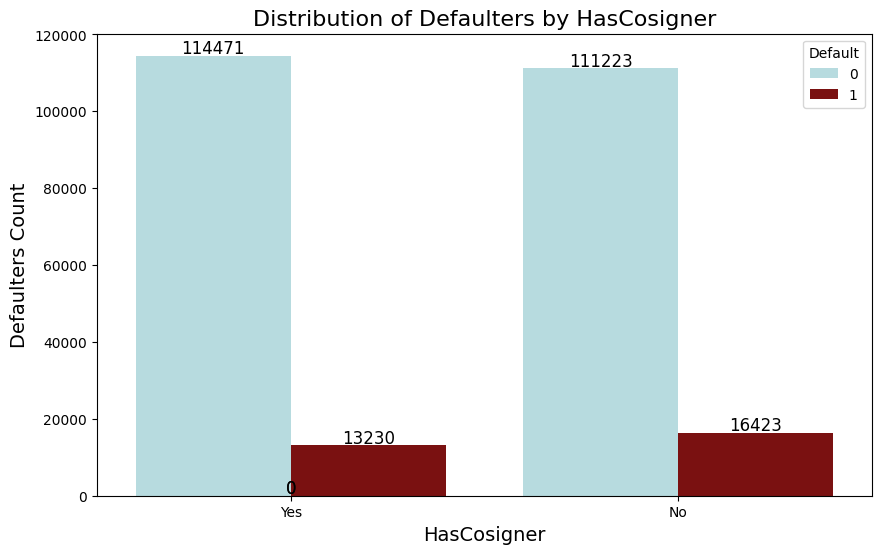

In [22]:
#Distribution of Defaulters by HasCosigner.
colors = ['powderblue', 'darkred']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='HasCoSigner', data=df, palette=colors, hue='Default')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Defaulters by HasCosigner', fontsize=16)
plt.xlabel('HasCosigner', fontsize=14)
plt.ylabel('Defaulters Count', fontsize=14)
plt.show()

From the visualization of the various categorical column above, it is deduced that all the categorical columns base on their distinct categories have a significant impact on default

####**STEP 2: DATA PREPROCESSING**

This is to clean the dataset, handle missing values, outliers, and encoding categorical variables. Ensure the data is ready for training.But as seen from the data manipulation above using df.info() and df.sum() there are no nulls and outliers in the dataset.

#### **Checking the correlation blw features in my dataset**

Checking the correlation between features in this dataset is a crucial step in data analysis, particularly in understanding relationships between variables.

Correlation analysis helps to determine whether and to what extent there is a relationship between two variables. The correlation coefficient ranges from -1 to 1:

**Positive correlation (correlation coefficient close to 1):** Indicates that as one variable increases, the other variable tends to increase as well.

**Negative correlation (correlation coefficient close to -1):** Indicates that as one variable increases, the other variable tends to decrease.

**No correlation (correlation coefficient close to 0):** Indicates no systematic relationship between the variables.

For the purpose of this analysis correlation between numerical columns will be checked as it has been observed that categorical columns base on their distinct categories have a significant impact on default

In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix= numeric_df.corr()
corr_matrix

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


####**EXPLANATION OF CORRELATION MATRIX**

- **Age**:
    - It has a negative correlation with "Income" and "Default", indicating that older applicants may have lower incomes and are less likely to default.
    - The correlation with other variables is close to zero, suggesting weak or no linear relationship.
  
- **Income**:
    - It has a negative correlation with "Age" and "Default", suggesting that higher income individuals may tend to be younger and less likely to default.
    - The correlation with other variables is close to zero, indicating weak linear relationships.

- **LoanAmount**:
    - It has a positive correlation with "MonthsEmployed" and "LoanTerm", indicating that larger loan amounts might be associated with longer employment duration and loan terms.
    - The correlation with other variables is close to zero, suggesting weak linear relationships.

- **CreditScore**:
    - It has a slight positive correlation with "LoanTerm" and "MonthsEmployed", indicating that higher credit scores might be associated with longer loan terms and longer employment duration.
    - The correlation with other variables is close to zero, indicating weak linear relationships.

- **MonthsEmployed**:
    - It has a positive correlation with "Income" and "DTIRatio", suggesting that longer employment duration might be associated with higher income and higher debt-to-income ratios.
    - It has negative correlations with "Default" and "Age", indicating that longer employment duration might be associated with a lower likelihood of default and younger age.
    - The correlation with other variables is close to zero, suggesting weak linear relationships.

- **NumCreditLines**:
    - It has a positive correlation with "Default" and "InterestRate", indicating that a higher number of credit lines might be associated with a higher likelihood of default and higher interest rates.
    - The correlation with other variables is close to zero, suggesting weak linear relationships.

- **InterestRate**:
    - It has a positive correlation with "LoanTerm" and "Default", indicating that higher interest rates might be associated with longer loan terms and a higher likelihood of default.
    - The correlation with other variables is close to zero, suggesting weak linear relationships.

- **LoanTerm**:
    - It has a positive correlation with "LoanAmount" and "InterestRate", suggesting that longer loan terms might be associated with larger loan amounts and higher interest rates.
    - The correlation with other variables is close to zero, suggesting weak linear relationships.

- **DTIRatio**:
    - It has a positive correlation with "MonthsEmployed", indicating that a higher debt-to-income ratio might be associated with longer employment duration.
    - The correlation with other variables is close to zero, suggesting weak linear relationships.

- **Default**:
    - It has negative correlations with "Age" and "Income", indicating that defaulting might be less likely among older individuals and those with higher incomes.
    - It has positive correlations with "InterestRate" and "NumCreditLines", suggesting that defaulting might be more likely with higher interest rates and a higher number of credit lines.
    - The correlation with other variables is close to zero, suggesting weak linear relationships.

These correlation coefficients provide insights into how the variables in this dataset are related to each other, which can help in understanding patterns and making informed decisions during  analysis.

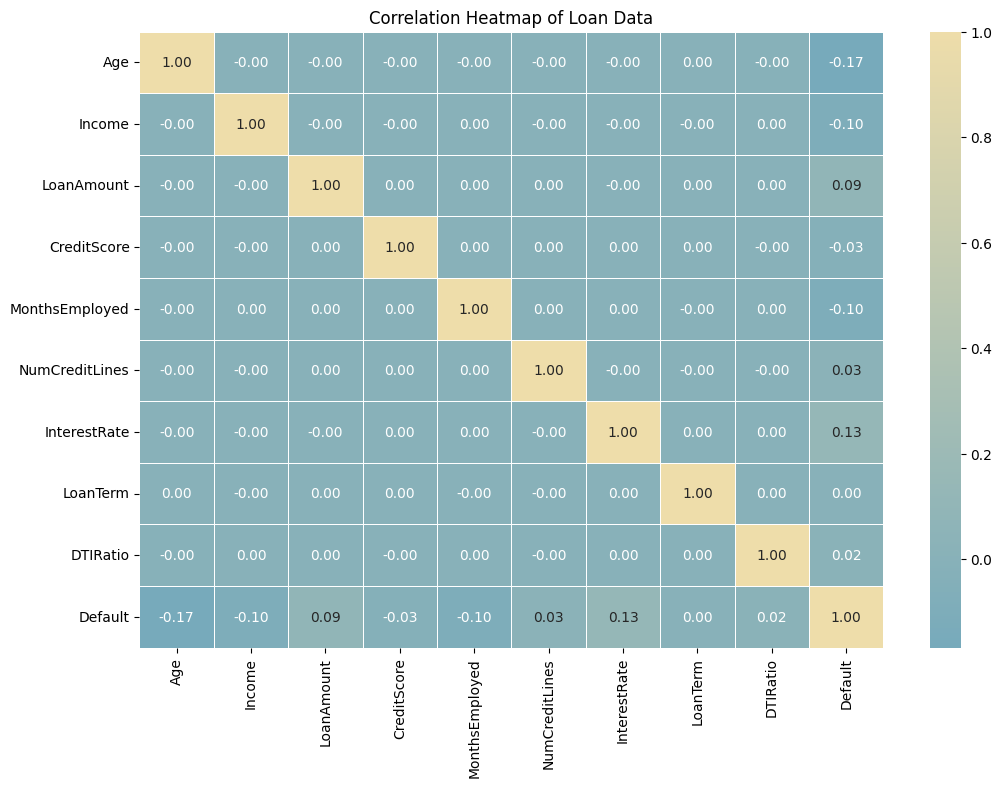

In [24]:
 # Visualizing correlation of dataset with a heat map.
plt.figure(figsize=(12, 8))
color=sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=color, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Loan Data')

plt.show()


#### **EXPLANATION OF THE CORRELATION COEFFICIENTS OF EACH FEATURE WITH DEFAULT VARIABLE IN THE DATASET.**
- **Age**: -0.167783 (Negative correlation)
- **Income**: -0.099119 (Negative correlation)
- **LoanAmount**: 0.086659 (Positive correlation)
- **CreditScore**: -0.034166 (Negative correlation)
- **MonthsEmployed**: -0.097374 (Negative correlation)
- **NumCreditLines**: 0.028330 (Positive correlation)
- **InterestRate**: 0.131273 (Positive correlation)
- **LoanTerm**: 0.000545 (Weak positive correlation)
- **DTIRatio**: 0.019236 (Positive correlation)

From this analysis, the following can be observed:

- **Negative correlation with "Default"**: Age, Income, CreditScore, MonthsEmployed - These variables are negatively correlated with the likelihood of default. This means that as these variables increase, the likelihood of default decreases.
  
- **Positive correlation with "Default"**: LoanAmount, NumCreditLines, InterestRate, DTIRatio - These variables are positively correlated with the likelihood of default. This means that as these variables increase, the likelihood of default also increases.

- **Weak correlation with "Default"**: LoanTerm - This variable has a very weak positive correlation with the likelihood of default, indicating that its impact on default is minimal compared to other variables.

These correlations provide insights into which features may have a stronger influence on the likelihood of default in the dataset. For example, higher interest rates and larger loan amounts are positively correlated with default, while older age and higher income are negatively correlated with default.

For the purpose of this analysis all the variables will be used including LoanTerm because though it has a weak positive correlation with default It has a positive correlation with "LoanAmount" and "InterestRate", suggesting that longer loan terms might be associated with larger loan amounts and higher interest rates. And LoanAmount and InterestRate has a positive correlation with default.

By including "LoanTerm" in this analysis, I am accounting for its indirect effects on default risk through its relationships with other relevant variables. This approach allows for a more nuanced understanding of the factors driving default probabilities, thereby enhancing the robustness of my analysis.









In [25]:
spearman_corr = numeric_df.corr(method='spearman')
print(spearman_corr)


                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001246   -0.002218    -0.000546       -0.000339   
Income         -0.001246  1.000000   -0.000863    -0.001428        0.002676   
LoanAmount     -0.002218 -0.000863    1.000000     0.001270        0.002820   
CreditScore    -0.000546 -0.001428    0.001270     1.000000        0.000614   
MonthsEmployed -0.000339  0.002676    0.002820     0.000614        1.000000   
NumCreditLines -0.000890 -0.002021    0.000792     0.000012        0.001265   
InterestRate   -0.001129 -0.002314   -0.002288     0.000435        0.000098   
LoanTerm        0.000268 -0.001002    0.002538     0.001134       -0.001172   
DTIRatio       -0.004693  0.000204    0.001123    -0.001037        0.001766   
Default        -0.167791 -0.099087    0.086664    -0.034170       -0.097367   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001129  0.00026

In [26]:
numeric_df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

####**Drop columns that won't be necessary for prediction in future engineering.**

In [27]:
df.drop('LoanID', axis=1, inplace=True)
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [28]:
#Import libraries needed for model preparation and training
!pip install scikit-optimize

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,roc_auc_score,make_scorer, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFromModel
from scipy.stats import uniform, randint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


In [29]:
# Separate features and target
X = df.drop('Default', axis =1)
y = df['Default']

<Axes: xlabel='Default'>

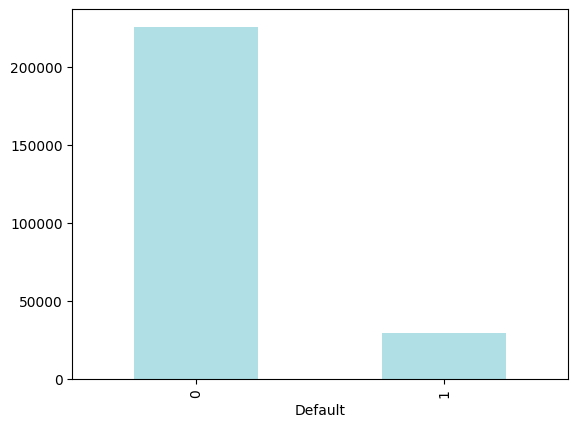

In [30]:
# Check for imbalance data in y target
y.value_counts().plot (kind ='bar')

In [31]:
#Split data into train, temp(which will be further split into test and validation set after transformation)using Stratified split because of the imbalanceace nature of the y(target) variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [32]:
#Define categorical and numerical columns

numeric_columns = ['Age',	'Income',	'LoanAmount',	'CreditScore',	'MonthsEmployed',	'NumCreditLines',	'InterestRate',	'LoanTerm',	'DTIRatio']

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


In [33]:
#Define categorical and numerical columns

numeric_columns = ['Age',	'Income',	'LoanAmount',	'CreditScore',	'MonthsEmployed',	'NumCreditLines',	'InterestRate',	'LoanTerm',	'DTIRatio']

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Define the transformers for each type of feature
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('one hot', OneHotEncoder(handle_unknown='ignore', drop='first') )
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='passthrough' # Pass through the remaining columns (target variable) without transformation
    )

In [34]:
#Apply preprocessor to data frame as a new variable df_processed
X_train_p= preprocessor.fit_transform(X_train)
X_temp_p = preprocessor.transform(X_temp)


In [35]:
# Convert transformed  train data back to a DataFrame
# Get feature names from the preprocessor
feature_names = numeric_columns + \
               list(preprocessor.named_transformers_['cat']['one hot'].get_feature_names_out(categorical_columns))

X_train_p = pd.DataFrame(X_train_p, columns=feature_names)
X_train_p

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0.058824,0.976741,0.596443,0.981785,0.882353,0.333333,0.594348,0.25,0.7250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.352941,0.775828,0.261524,0.032787,0.773109,0.000000,0.025217,0.75,0.8625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.607843,0.820176,0.986106,0.901639,0.361345,1.000000,0.736522,0.00,0.9125,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.333333,0.724287,0.731791,0.877960,0.067227,1.000000,0.277826,0.25,0.3250,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.627451,0.393670,0.387495,0.083789,0.974790,0.333333,0.657391,1.00,0.5125,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178737,0.000000,0.742835,0.559251,0.548270,0.420168,0.666667,0.062174,0.50,0.3250,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
178738,0.960784,0.181831,0.363859,0.151184,0.689076,1.000000,0.057391,0.75,0.8750,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
178739,0.823529,0.247928,0.099311,0.528233,0.352941,0.000000,0.463913,0.00,0.9125,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178740,0.372549,0.308869,0.291507,0.293260,0.126050,0.333333,0.765652,1.00,0.1750,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# Convert transformed  temp data back to a DataFrame
# Get feature names from the preprocessor
feature_names = numeric_columns + \
               list(preprocessor.named_transformers_['cat']['one hot'].get_feature_names_out(categorical_columns))

X_temp_p = pd.DataFrame(X_temp_p, columns=feature_names)
X_temp_p

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0.823529,0.918540,0.146768,0.233151,0.655462,0.333333,0.809565,1.00,0.3875,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.921569,0.622856,0.482639,0.688525,0.621849,0.000000,0.481304,1.00,0.5750,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.313725,0.962548,0.425202,0.704918,0.789916,1.000000,0.688261,0.25,0.4250,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.666667,0.197757,0.523867,0.116576,0.815126,0.666667,0.850000,1.00,0.6500,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.647059,0.386025,0.551541,0.140255,0.605042,0.666667,0.598261,0.25,0.3375,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76600,0.921569,0.267565,0.034502,0.429872,0.714286,1.000000,0.386957,0.50,0.0375,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
76601,0.098039,0.481589,0.286944,0.743169,0.848739,0.000000,0.246957,0.00,0.1000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76602,0.725490,0.212950,0.140499,0.021858,0.487395,0.000000,0.372174,0.00,0.6375,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
76603,0.176471,0.252269,0.204580,0.670310,0.386555,1.000000,0.674783,0.25,0.7750,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
#Split X_temp into test and validation set
X_val, X_test, y_val, y_test = train_test_split(X_temp_p, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [38]:
# Train Random Forest  classification model to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_p, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred_rf =rf.predict(X_test)

#print( classification_report(y_test,y_pred))
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

cm = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Get predicted probabilities
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Correct ROC AUC calculation using probabilities
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33855
           1       0.63      0.03      0.05      4448

    accuracy                           0.89     38303
   macro avg       0.76      0.51      0.49     38303
weighted avg       0.86      0.89      0.84     38303

True Negatives: 33788
False Positives: 67
False Negatives: 4332
True Positives: 116
ROC AUC Score: 0.736926272008534


In [40]:
# Get importance of random forest model
importances = rf.feature_importances_
feature_names = X_train_p.columns  #X_train_p is dataframe with feature names

# Check lengths before creating DataFrame
print(len(feature_names), len(importances))

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values('Importance', ascending=False))

24 24
                         Feature  Importance
1                         Income    0.125298
6                   InterestRate    0.119908
2                     LoanAmount    0.113028
0                            Age    0.102981
3                    CreditScore    0.100054
4                 MonthsEmployed    0.097500
8                       DTIRatio    0.088001
7                       LoanTerm    0.040367
5                 NumCreditLines    0.031902
17               HasMortgage_Yes    0.015095
16          MaritalStatus_Single    0.014237
12      EmploymentType_Part-time    0.012245
18             HasDependents_Yes    0.012238
15         MaritalStatus_Married    0.012221
13  EmploymentType_Self-employed    0.012140
20         LoanPurpose_Education    0.011836
22             LoanPurpose_Other    0.011821
11                 Education_PhD    0.011740
19          LoanPurpose_Business    0.011715
10            Education_Master's    0.011649
23               HasCoSigner_Yes    0.011590
9   

From the feature importance above taking the numerical column into consideration, columns below 0.05 importance(Loan term and Numcredit lines) will be dropped for better model performnace and optimization.

In [41]:
# Get column names of processed dataframe
X_train_p.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_Yes', 'HasDependents_Yes',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_Yes'],
      dtype='object')

In [42]:
#Define categorical columns to  further determine categorical column importance using chi2 and p-value.
X_cat = X_train_p[[  'Education_High School', "Education_Master's", 'Education_PhD',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_Yes', 'HasDependents_Yes',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_Yes']]

In [43]:
chi2_stats, p_values = chi2(X_cat, y_train)

chi2_result = pd.DataFrame({'Feature': X_cat.columns, 'Chi2': chi2_stats, 'P-Value': p_values}).sort_values(by='Chi2', ascending=False)
print("Chi-Square Result:\n", chi2_result)

Chi-Square Result:
                          Feature        Chi2       P-Value
5      EmploymentType_Unemployed  166.851053  3.605494e-38
14               HasCoSigner_Yes  121.175075  3.498543e-28
9              HasDependents_Yes  108.184275  2.449151e-25
0          Education_High School   67.247970  2.394172e-16
6          MaritalStatus_Married   63.945436  1.279133e-15
12              LoanPurpose_Home   59.956224  9.699079e-15
8                HasMortgage_Yes   47.759113  4.819389e-12
2                  Education_PhD   33.299929  7.898554e-09
1             Education_Master's   27.141836  1.890619e-07
10          LoanPurpose_Business   19.637537  9.361189e-06
7           MaritalStatus_Single    2.688627  1.010669e-01
11         LoanPurpose_Education    2.123720  1.450339e-01
3       EmploymentType_Part-time    1.971688  1.602688e-01
13             LoanPurpose_Other    0.619684  4.311649e-01
4   EmploymentType_Self-employed    0.040828  8.398711e-01


All categorical columns are impotant since all p-value is below 0.05 .

In [44]:
#Choose selected columns for train,test,and validation dataset from processed dataset
X_train_ps = X_train_p.drop(['LoanTerm', 'NumCreditLines'], axis =1)
X_test_s = X_test.drop(['LoanTerm', 'NumCreditLines'], axis =1)
X_val_s = X_val.drop(['LoanTerm', 'NumCreditLines'], axis =1)

In [45]:
X_train_ps.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'InterestRate', 'DTIRatio', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_Yes',
       'HasDependents_Yes', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other', 'HasCoSigner_Yes'],
      dtype='object')

<Axes: xlabel='Default'>

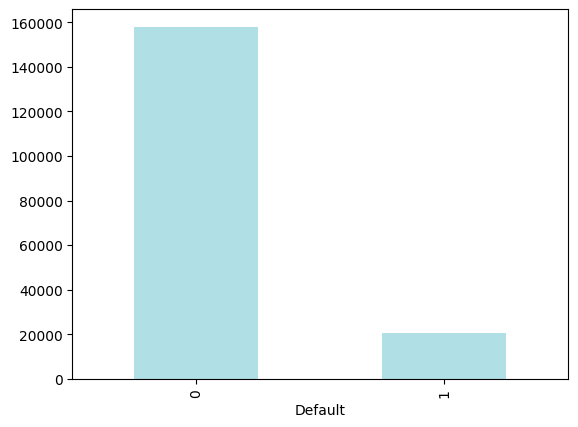

In [46]:
y_train.value_counts().plot(kind = 'bar')

<Axes: xlabel='Default'>

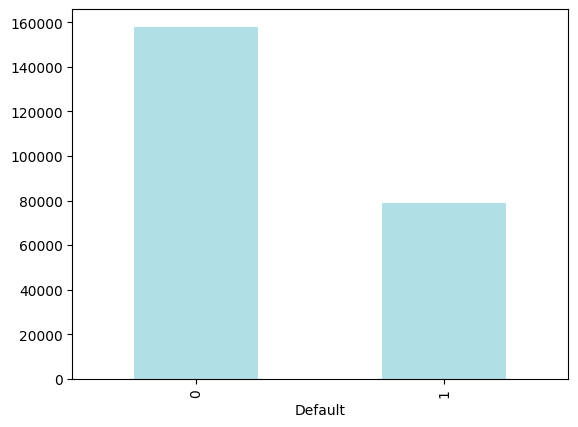

In [47]:
# Balance data using over sampling method (Oversample the training data using SMOTE)
smote = SMOTE(sampling_strategy = 0.5, random_state = 42)
X_train_oversampled,y_train_oversampled = smote.fit_resample (X_train_ps,y_train)

y_train_oversampled.value_counts().plot (kind ='bar')

<Axes: xlabel='Default'>

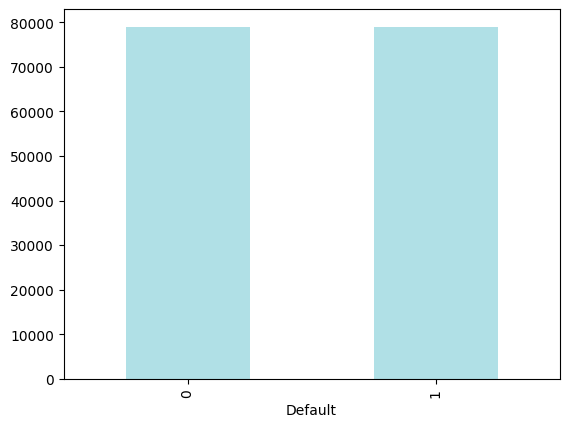

In [48]:
# Balance data using under sampling method (Undersample the oversampled training data using RandomUnderSampler)

rus = RandomUnderSampler(random_state=42)
X_train_res,y_train_res = rus.fit_resample(X_train_oversampled,y_train_oversampled)

y_train_res.value_counts().plot(kind = 'bar')

####**MODEL DEVELOPMENT**
Here the appropraite machine learning algorithm for binary classification will be choosen. The model will be trained and fine tuned to achieve optimal predictive performance. Model's Accuracy, f1 score, roc_auc and other relevent metrics will be evaluated.

For the purpose of this analysis five machine learning algorithm will be deployed and their predictiveperformance will be compared.

In [49]:
# Create models instance
rfc = RandomForestClassifier(class_weight = 'balanced', n_estimators=100, random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)
xgb = XGBClassifier(scale_pos_weight=1, random_state = 42)

####**Random Forest Classifier (rfc)**

In [50]:
#Train model with actual dataset without balancing
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
y_pred = rfc.predict(X_test_s)
#print( classification_report(y_test,y_pred))
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Get predicted probabilities
y_pred_prob = rfc.predict_proba(X_test_s)[:, 1]

# Correct ROC AUC calculation using probabilities
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     33855
           1       0.24      0.48      0.32      4448

    accuracy                           0.77     38303
   macro avg       0.58      0.64      0.59     38303
weighted avg       0.84      0.77      0.80     38303

True Negatives: 27225
False Positives: 6630
False Negatives: 2317
True Positives: 2131
ROC AUC Score: 0.7207679990256798


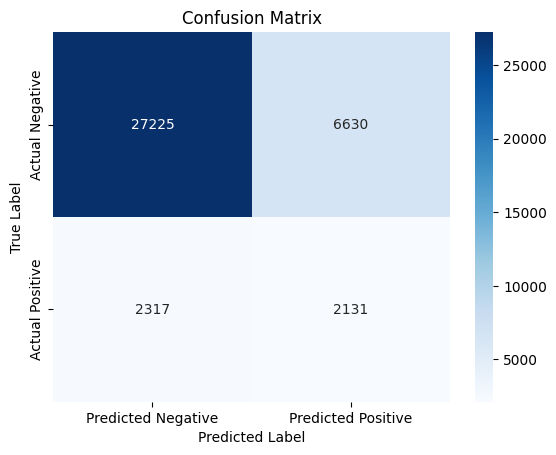

In [52]:
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####**GradientBoostingClassifier (gbc)**

In [53]:
gbc.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

In [54]:
y_pred = gbc.predict(X_test_s)
print(f"Classification Report (resampled):\n{classification_report(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Get predicted probabilities
y_pred_prob = gbc.predict_proba(X_test_s)[:, 1]

# Correct ROC AUC calculation using probabilities
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Classification Report (resampled):
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     33855
           1       0.23      0.61      0.33      4448

    accuracy                           0.72     38303
   macro avg       0.58      0.67      0.58     38303
weighted avg       0.85      0.72      0.76     38303

True Negatives: 24709
False Positives: 9146
False Negatives: 1730
True Positives: 2718
ROC AUC Score: 0.732092864698051


####**eXtreme Gradient Boosting Classifier (xgb)**

In [55]:
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
y_pred = xgb.predict(X_test_s)
print(f"Classification Report (resampled):\n{classification_report(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Get predicted probabilities
y_pred_prob = xgb.predict_proba(X_test_s)[:, 1]

# Correct ROC AUC calculation using probabilities
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Classification Report (resampled):
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     33855
           1       0.28      0.41      0.33      4448

    accuracy                           0.81     38303
   macro avg       0.60      0.64      0.61     38303
weighted avg       0.84      0.81      0.82     38303

True Negatives: 29175
False Positives: 4680
False Negatives: 2618
True Positives: 1830
ROC AUC Score: 0.7319983877762655


In [60]:
# Hyperparameter tuning for best mode (xgb)
params = {
    'n_estimators': [100, 200],
     'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'subsample': uniform(0.6, 0.4)
}

random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=params,
                                   n_iter=10,  # Number of parameter settings sampled
                                   cv=3,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train_res, y_train_res)
best_model = random_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test_s)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print AUC-ROC
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_s)[:, 1])
print(f"\nAUC-ROC: {roc_auc}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:55:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[29848  4007]
 [ 2864  1584]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     33855
           1       0.28      0.36      0.32      4448

    accuracy                           0.82     38303
   macro avg       0.60      0.62      0.61     38303
weighted avg       0.84      0.82      0.83     38303


AUC-ROC: 0.7167878324721703


In [69]:
# Best model (Xgb) prediction using validation dataset

xgb.fit(X_train_res, y_train_res)

y_pred_v = xgb.predict(X_val_s)
print(f"Classification Report (resampled):\n{classification_report(y_val, y_pred_v)}")

cm = confusion_matrix(y_val, y_pred_v)
tn, fp, fn, tp = cm.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Get predicted probabilities
y_pred_prob = xgb.predict_proba(X_val_s)[:, 1]

# Correct ROC AUC calculation using probabilities
roc_auc = roc_auc_score(y_val, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Classification Report (resampled):
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     33854
           1       0.28      0.41      0.33      4448

    accuracy                           0.81     38302
   macro avg       0.60      0.64      0.61     38302
weighted avg       0.84      0.81      0.82     38302

True Negatives: 29207
False Positives: 4647
False Negatives: 2635
True Positives: 1813
ROC AUC Score: 0.7252125896464845
